In [ ]:
from langchain_tavily import TavilySearch
from typing import TypedDict
from langgraph.graph import StateGraph


# instantiate tavily search tool
tavily = TavilySearch(
    max_results=3,
    topic="general"
)

class AgentState(TypedDict):
    search_queries: list[str]
    search_results: list[str]


def search_executor_node(state: AgentState):
    results = state['search_results'] or []
    for q in state['search_queries']:
        response = tavily.invoke({'query': q})
        for r in response['results']:
            results.append(r['content'])
    return {'search_results': results} 


In [ ]:
# build simple POC agentic graph
graph_builder = StateGraph(AgentState)
graph_builder.add_node('search_executor', search_executor_node)
graph_builder.set_entry_point('search_executor')
graph = graph_builder.compile()

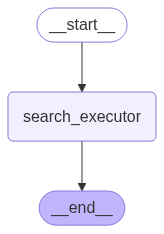

In [ ]:
# display graph diagram
graph

In [ ]:
# run agentic graph on sample search queries related to car purchases
thread = {'configurable': {'thread_id': '1'}}
for s in graph.stream({
    'search_queries': [
        'What is the best time of year to buy a car?',
        'What consumers are most likely to need a new car?',
        'What regions in the US buy the most cars?',
    ],
    'search_results': []
}, thread):
    print(s)

{'search_executor': {'search_results': ['New Year\'s Eve and New Year\'s Day are some of the best times to buy a new or used car. These days usually still have end-of-year sales events that are supported with great financing and lease deals from automakers. Yes, these days are usually considered to be the end of the previous year for automakers and their dealerships, despite their "new', 'Best time of the year to buy a car Best month to buy a car. In the past, December was the month with the highest discounts off MSRP, but the pandemic has upended the market and it has taken years', 'Finally, another good time to buy is at the holiday sales events automakers create to move the metal throughout the year. Usually these events are tied to significant rebates and special financing.', 'Another measure of new vehicle prices, the Consumer Price Index (CPI), highlights the recent growth in car prices compared to the rest of the 21st century. Between January 2000 and January 2021', "Annual car 